In [217]:
from config import cfg
from datasets.dataset import VocDataset
from utils.generator import Generator
from ssd import ssd_model
from utils.preprocess import TrainAugmentation
import cv2
import numpy as np
import matplotlib.pyplot as plt
dataset = VocDataset(cfg.voc_path, class_mapping=cfg.class_mapping)
dataset.prepare()
train_img_info = [info for info in dataset.get_image_info_list() if info.type == 'trainval']  # 训练集
print("train_img_info:{}".format(len(train_img_info)))
test_img_info = [info for info in dataset.get_image_info_list() if info.type == 'test']  # 测试集
print("test_img_info:{}".format(len(test_img_info)))

# 生成器
transforms = TrainAugmentation(cfg.image_size, cfg.mean_pixel, cfg.std)

Parsing annotation files
train_img_info:2501
test_img_info:2510


In [218]:
def draw(image_info):
    image = cv2.imread(image_info.image_path)[:, :, ::-1]
    gt_boxes = image_info.boxes.copy()  # 不改变原来的
    im = image.copy()
    for box in gt_boxes.astype(np.int32):
        y1, x1, y2, x2 = box
        cv2.rectangle(im, (x1, y1), (x2, y2), (0, 0, 255), 2)
        #print(box)
    return im

def trans_and_draw(transforms, image_info):
    image = cv2.imread(image_info.image_path)[:, :, ::-1]
    gt_boxes = image_info.boxes.copy()  # 不改变原来的
    gt_class_ids = image_info.labels

    # resize图像
    image, gt_boxes, gt_class_ids = transforms(image, gt_boxes, gt_class_ids)
    #print(type(image))
    #print(gt_boxes)
    for box in gt_boxes.astype(np.int32):
        y1, x1, y2, x2 = box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return image

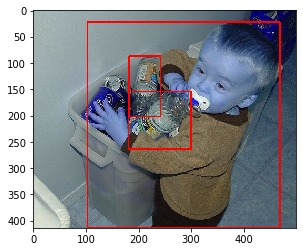

In [219]:
im_info=test_img_info[np.random.choice(len(test_img_info))]
im=draw(im_info)
plt.imshow(im[:,:,::-1])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


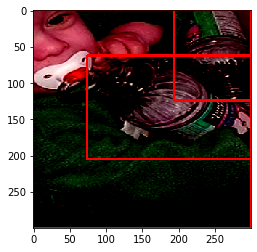

In [224]:
im=trans_and_draw(transforms,im_info)
plt.imshow(im[:,:,::-1])
plt.show()